> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
#convert release date to a datetime data type and budget/revenue to int64 to show all numbers.

tmdb_db = pd.read_csv('tmdb-movies.csv')
convert_data=['budget_adj', 'revenue_adj']
tmdb_db['release_date'] = pd.to_datetime(tmdb_db['release_date']) 
tmdb_db[convert_data]=tmdb_db[convert_data].applymap(np.int64)
tmdb_db['genres'].astype(str)
tmdb_db.dropna(how = 'any',inplace = True)

<h1> Question no 2 : Most famous director and his/her best 3 movies </h1>

In [3]:
#Creating groupby object

director_gb = tmdb_db.groupby('director')

In [4]:
# here we get most popular director : Christopher Nolan => according to popularity column

director_gb.sum().sort_values('popularity',ascending = False).head(5)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
Christopher Nolan,235195,60.449268,959000000,4053833672,1017,40997,54.5,14055,958929508,4026409815
Peter Jackson,238493,45.005375,1086000000,5943642820,1267,30057,58.3,16048,1096858947,6364545288
Colin Trevorrow,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,137999939,1392445892
Ridley Scott,532204,30.297828,847000000,2193060497,1093,16829,54.5,16024,898419625,2394074073
Steven Spielberg,77794,29.388996,637500000,5257606337,1424,20045,77.9,21931,813400092,9623371538


In [29]:
# Here we acheive the top 3 movies of christofer nolan [ the most famous director ]
#top sorting based on vote average. you can try popularity also ( just replace 'vote_average' with 'popularity' in sort_values function)

movie_data = director_gb.get_group('Christopher Nolan').sort_values('vote_average',ascending = False).head(3)[['original_title','genres','popularity','vote_average']].reset_index()

In [30]:
movie_data

,index,original_title,genres,popularity,vote_average
0,2875,The Dark Knight,Drama|Action|Crime|Thriller,8.466668,8.1
1,629,Interstellar,Adventure|Drama|Science Fiction,24.949134,8.0
2,1919,Inception,Action|Thriller|Science Fiction|Mystery|Adventure,9.363643,7.9


[Text(0, 0, 'The Dark Knight'),
 Text(0, 0, 'Interstellar'),
 Text(0, 0, 'Inception')]

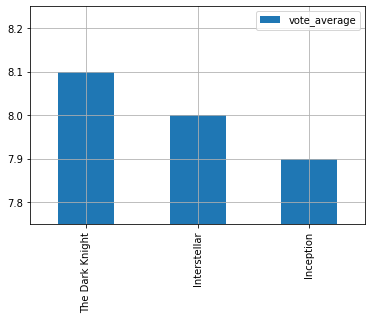

In [31]:
ax = movie_data[['original_title', 'vote_average',]].plot(kind = 'bar')
ax.grid()
ax.set_ylim(7.75,8.25)
ax.set_xticklabels(movie_data['original_title'])

[Text(0, 0, 'Interstellar'),
 Text(0, 0, 'Inception'),
 Text(0, 0, 'The Dark Knight')]

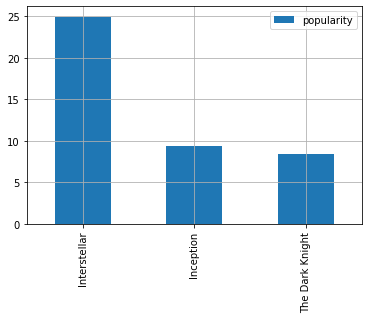

In [19]:
ax = movie_data[['original_title', 'popularity',]].sort_values('popularity',ascending = False).plot(kind = 'bar')
ax.grid()
ax.set_xticklabels(movie_data.sort_values('popularity',ascending = False)['original_title'])

[Text(0, 0, 'Inside Out'),
 Text(0, 0, 'The Wolf of Wall Street'),
 Text(0, 0, 'Partly Cloudy'),
 Text(0, 0, 'Big Hero 6'),
 Text(0, 0, 'Back to the Future')]

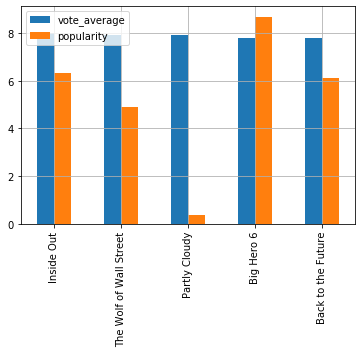

In [83]:
ax = tmdb_db[tmdb_db.mask].sort_values('vote_average',ascending = False).head(5)[['original_title','vote_average','popularity']].plot(kind='bar')
ax.grid()
ax.set_xticklabels(tmdb_db[tmdb_db.mask].sort_values('vote_average',ascending = False).head(5)['original_title'])

<h1> Question no 1 : top 5 comedy movies </h1>

In [33]:
def split_str(string):
    return string.split('|')

split_str('Drama|Action|Crime|Thriller')

['Drama', 'Action', 'Crime', 'Thriller']

In [34]:
#using split to break '|' seperated srtring to list.

tmdb_db.genres = tmdb_db.genres.apply(lambda x : split_str(x))


In [35]:
#Creating a binary mask for cemedy movies

tmdb_db.mask = tmdb_db.genres.copy()
tmdb_db.mask = tmdb_db.mask.apply(lambda x : 'Comedy' in x)

In [80]:
#dataframe of all comedy movies

tmdb_db[tmdb_db.mask]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,"[Family, Animation, Adventure, Comedy]",Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,68079970,1064192016
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]",Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,160999929,785411574
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,http://www.pixels-movie.com/,Chris Columbus,Game On.,...,Video game experts are recruited by the milita...,105,"[Action, Comedy, Science Fiction]",Columbia Pictures|Happy Madison Productions,2015-07-16,1575,5.8,2015,80959964,224146025
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,The men who made millions from a global econom...,130,"[Comedy, Drama]",Paramount Pictures|Plan B Entertainment|Regenc...,2015-12-11,1545,7.3,2015,25759988,122678731
27,207703,tt2802144,4.503789,81000000,403802136,Kingsman: The Secret Service,Taron Egerton|Colin Firth|Samuel L. Jackson|Mi...,http://www.kingsmanmovie.com/,Matthew Vaughn,Manners maketh man.,...,The story of a super-secret spy organization t...,130,"[Crime, Comedy, Action, Adventure]",Twentieth Century Fox Film Corporation|Marv Fi...,2015-01-24,3833,7.6,2015,74519967,371497801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10372,13063,tt0115819,0.181665,125000,0,Cannibal! The Musical,Trey Parker|Dian Bachar|Ian Hardin|Jon Hegel|M...,http://www.cannibalthemusical.net/index.shtml,Trey Parker,All Singing! All Dancing! All Flesh Eating!,...,Heading through Colorado Territory in search o...,97,"[Comedy, History, Horror]",Avenging Conscience|Troma Entertainment|Cannib...,1993-10-01,19,6.7,1993,188683,0
10489,6978,tt0090728,0.960984,25000000,11000000,Big Trouble in Little China,Kurt Russell|Kim Cattrall|Dennis Dun|James Hon...,http://www.theofficialjohncarpenter.com/big-tr...,John Carpenter,Adventure doesn't come any bigger!,...,When trucker Jack Burton agreed to take his fr...,99,"[Adventure, Fantasy, Action, Comedy]",Twentieth Century Fox Film Corporation|TAFT En...,1986-05-30,347,6.7,1986,49735160,21883470
10657,5722,tt0065466,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,http://www.beyondthevalleyofthedolls.com/home....,Russ Meyer,This Is Not A Sequel. There Has Never Been Any...,...,A hip and happenin' all girl rock group head t...,109,"[Comedy, Drama, Thriller]",Twentieth Century Fox Film Corporation,1970-07-17,19,6.2,1970,0,0
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,[Comedy],Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9025291,471320797


In [81]:
# Top 5 comedy movies based on vote average. you can try popularity also ( just replace 'vote_average' with 'popularity' in sort_values function)
#sorted and cleaned

tmdb_db[tmdb_db.mask].sort_values('vote_average',ascending = False).head(5)[['original_title','director','genres','vote_average']].reset_index()

,index,original_title,director,genres,vote_average
0,9,Inside Out,Pete Docter,"[Comedy, Animation, Family]",8.0
1,5428,The Wolf of Wall Street,Martin Scorsese,"[Crime, Drama, Comedy]",7.9
2,1661,Partly Cloudy,Peter Sohn,"[Adventure, Animation, Comedy, Family, Fantasy]",7.9
3,635,Big Hero 6,Don Hall|Chris Williams,"[Adventure, Family, Animation, Action, Comedy]",7.8
4,6081,Back to the Future,Robert Zemeckis,"[Adventure, Comedy, Science Fiction, Family]",7.8


[Text(0, 0, 'Inside Out'),
 Text(0, 0, 'The Wolf of Wall Street'),
 Text(0, 0, 'Partly Cloudy'),
 Text(0, 0, 'Big Hero 6'),
 Text(0, 0, 'Back to the Future')]

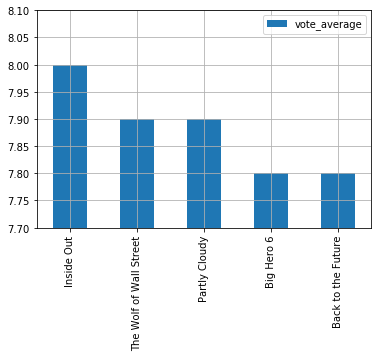

In [44]:
ax = tmdb_db[tmdb_db.mask].sort_values('vote_average',ascending = False).head(5)[['original_title','vote_average']].plot(kind='bar')
ax.grid()
ax.set_ylim(7.7,8.1)
ax.set_xticklabels(tmdb_db[tmdb_db.mask].sort_values('vote_average',ascending = False).head(5)['original_title'])

(6, 10)

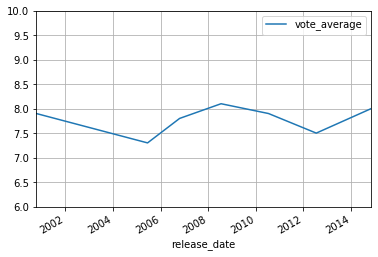

In [68]:
ax = director_gb.get_group('Christopher Nolan')[['release_date','vote_average']].set_index('release_date').plot()
ax.grid()
ax.set_ylim(6,10)

(7, 9)

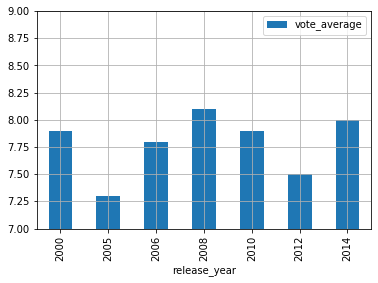

In [71]:
ax = director_gb.get_group('Christopher Nolan')[['release_year','vote_average']].sort_values('release_year').set_index('release_year').plot(kind = 'bar')
ax.grid()
ax.set_ylim(7,9)

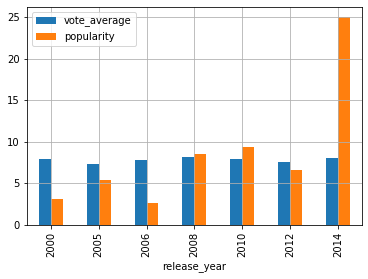

In [78]:
ax = director_gb.get_group('Christopher Nolan')[['release_year','vote_average','popularity']].sort_values('release_year').set_index('release_year').plot(kind = 'bar')
ax.grid()
#ax.set_ylim(6,10)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

5

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])